# Importações

In [7]:
import matplotlib.pyplot as plt
import numpy as np


from mpl_toolkits.mplot3d.axes3d import Axes3D
from sympy import symbols, diff


%matplotlib inline 

## Visualização de gráficos 3d

### Minimizando a função 
$$f(x, y) = \frac {1} {3^{-x^2 - y ^ 2} + 1}$$

#### Minimizando
$$f(x,y) = \frac {1}{r+1}$$
Com $r$ igual a $3^{-x^2 - y ^ 2}$

In [32]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [59]:
#Gerando dados
x = np.linspace(start = -2, stop = 2, num = 5)
y = np.linspace(start = -2, stop = 2, num = 200)


x, y = np.meshgrid(x, y)

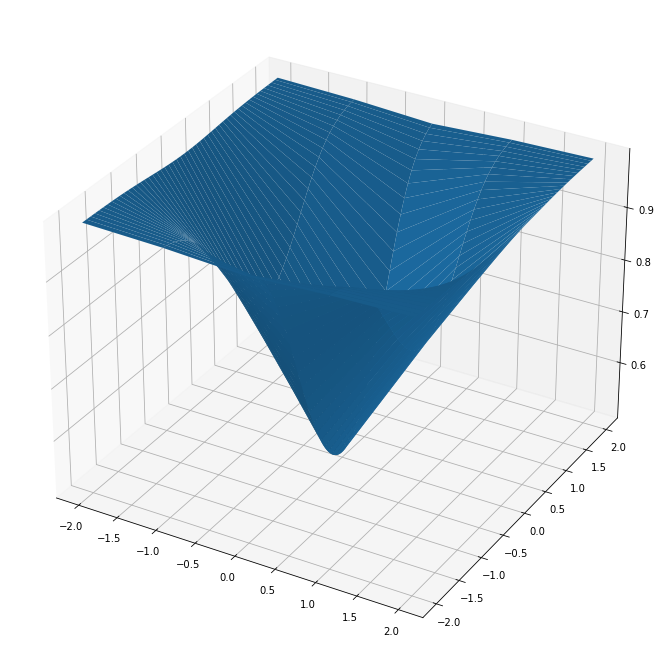

In [56]:
#Gerando grafico 3d


fig = plt.figure(figsize = [16,12])
ax = fig.gca(projection = "3d")

ax.plot_surface(x, y, f(x, y))
